## 06.04. X11 분해

분기별 데이터와 월별 데이터를 분해할 때 인기 있는 또 하나의 기법은 미국 인구 조사국(the US Census Bureau)과 캐나다 통계청(Statistics Canada)에서 창안한 X11 기법입니다.

이 기법은 고전적인 분해에 기초하면서, 이전 절에서 다룬 고전적인 분해의 단점을 극복하기 위한 많은 추가적인 단계와 특징을 포함합니다. **특별히 양 끝점을 포함한 모든 관측값에 대해 추세-주기 측정을 할 수 있고, 계절성분이 시간에 따라 느리게 변하도록 합니다.** 

X11은 거래일 변동, 휴일 효과, 알려진 예측치에 의한 효과 등을 다루기 위한 몇 가지 정교한 방법도 포함하고 있습니다. 이 과정은 완전히 자동이고, **시계열에서 나타나는 특이점이나 수준 변화가 주는 영향에 대해 매우 잘 견디는 경향이 있습니다.**

**X11 분해 방법은 곱셈 분해 또는 덧셈 분해를 사용하여 원래 시계열을 조정합니다. 모델은 세 가지 X-11 구성요소(추세 주기, 계절, 불규칙)를 추정하기 위해 반복 프로세스를 사용하여 적합합니다. 추세주기 구성 요소에는 장기 추세와 장기 순환 효과가 모두 포함됩니다. 불규칙 성분에는 추세와 계절 성분으로 설명할 수 없는 변동 효과가 포함됩니다.** 

<br>

In [19]:
install.packages('x13binary_1.1.57-4.tar.gz', repos=NULL, type='source')

In [21]:
library(tidyverse)
library(fpp3)
library(fpp2)
library(fpp)
library(forecast)
library(seasonal)

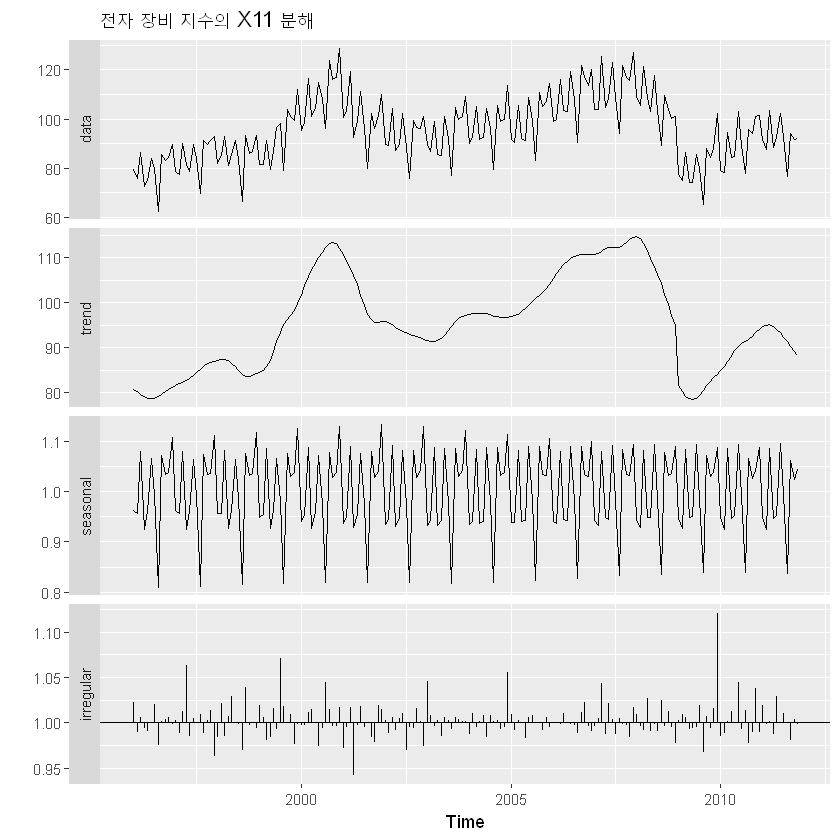

In [22]:
elecequip %>% seas(x11="") -> fit
autoplot(fit) +
  ggtitle("전자 장비 지수의 X11 분해")

X11 추세-주기는 다른 두 가지 기법보다 데이터에서 2009년 초반에 나타나는 갑작스럽게 떨어지는 패턴을 좀 더 잘 잡아내고, 2009년 말의 특이한 관측값이 이제 나머지 성분에서 더욱 분명하게 보입니다.

`seas()` 함수에서 주어진 출력으로, `seasonal()`가 계절성분을 추출할 것이고, `trendcycle()`가 추세-주기 성분을 추출할 것이고, `remainder()`가 나머지 성분을 추출할 것이고, `seasadj()`가 계절적으로 조정된 시계열을 계산할 것입니다.

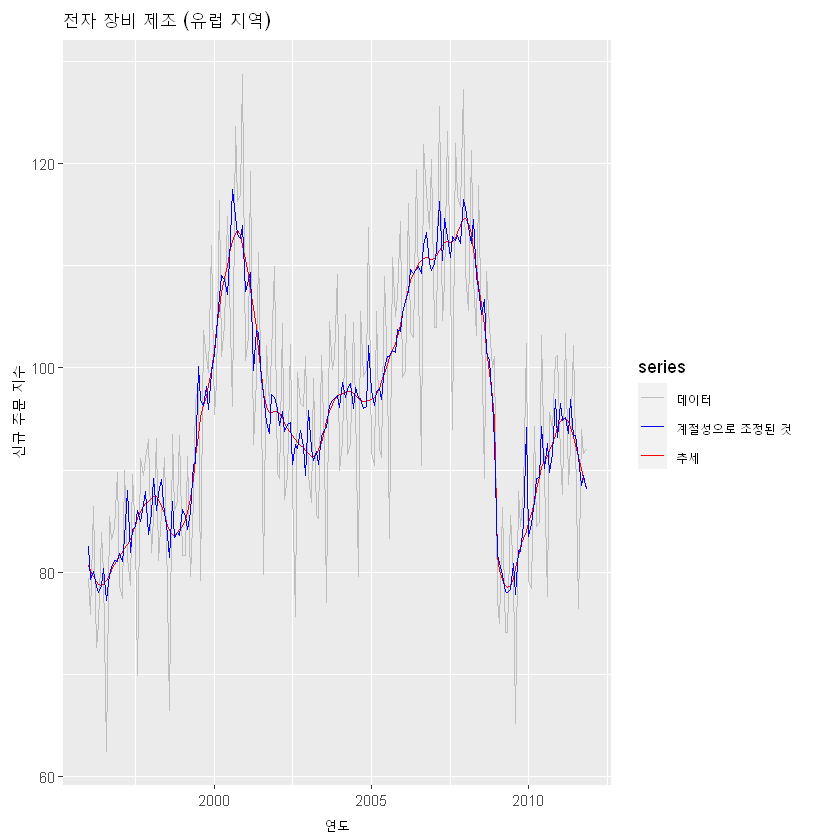

In [23]:
autoplot(elecequip, series="데이터") +
  autolayer(trendcycle(fit), series="추세") +
  autolayer(seasadj(fit), series="계절성으로 조정된 것") +
  xlab("연도") + ylab("신규 주문 지수") +
  ggtitle("전자 장비 제조 (유럽 지역)") +
  scale_colour_manual(values=c("gray","blue","red"),
             breaks=c("데이터","계절성으로 조정된 것","추세"))

* 원본 데이터에 대해 추세-주기 성분과 계절성으로 조정된 데이터

계절성분의 계절성 그래프와 계절성 부-시계열 그래프는 유용할 수 있습니다. 이러한 그래프는 시간에 따른 계절성분의 변화를 눈으로 볼 수 있도록 도와줍니다. 

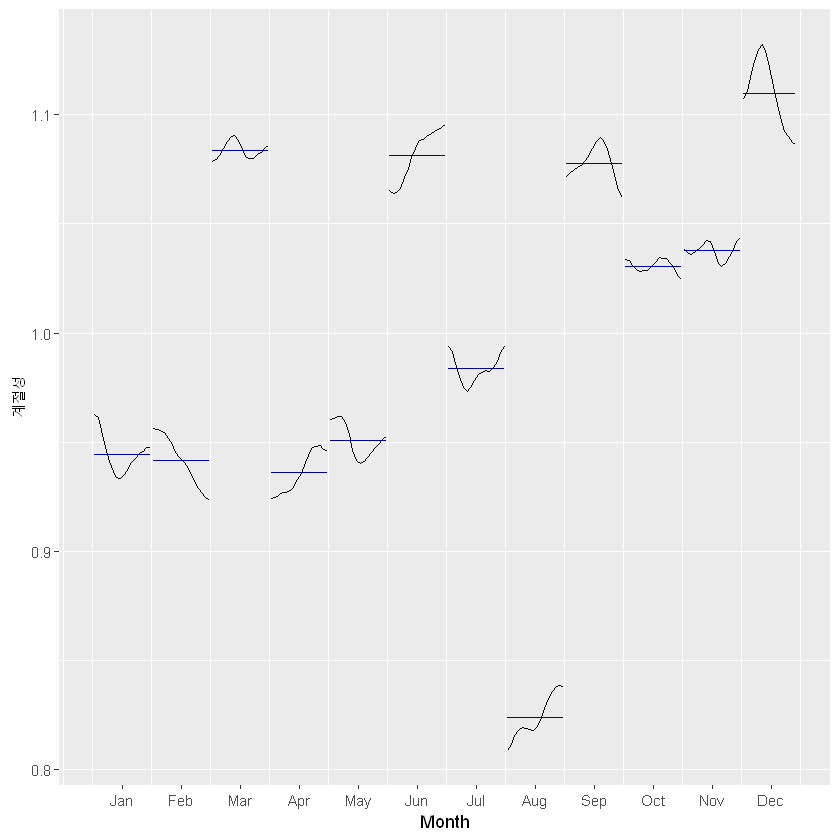

In [24]:
fit %>% seasonal() %>% ggsubseriesplot() + ylab("계절성")

<br>

## 06.05. SEATS 분해

“SEATS”는 “Seasonal Extraction in ARIMA Time Series(ARIMA 시계열에서 계절성 추출)”를 줄여 쓴 것입니다(ARIMA 모델은 8 장에서 다룹니다). 스페인 은행에서 이 방법을 개발하였으며, 이제는 전세계 정부 기관에서 널리 사용합니다. **이 방법은 분기별 데이터와 월별 데이터에서만 작동합니다. 따라서 일별, 시간별, 주별 등 다른 종류의 계절성은 다른 접근 방식으로 다뤄야 합니다.**

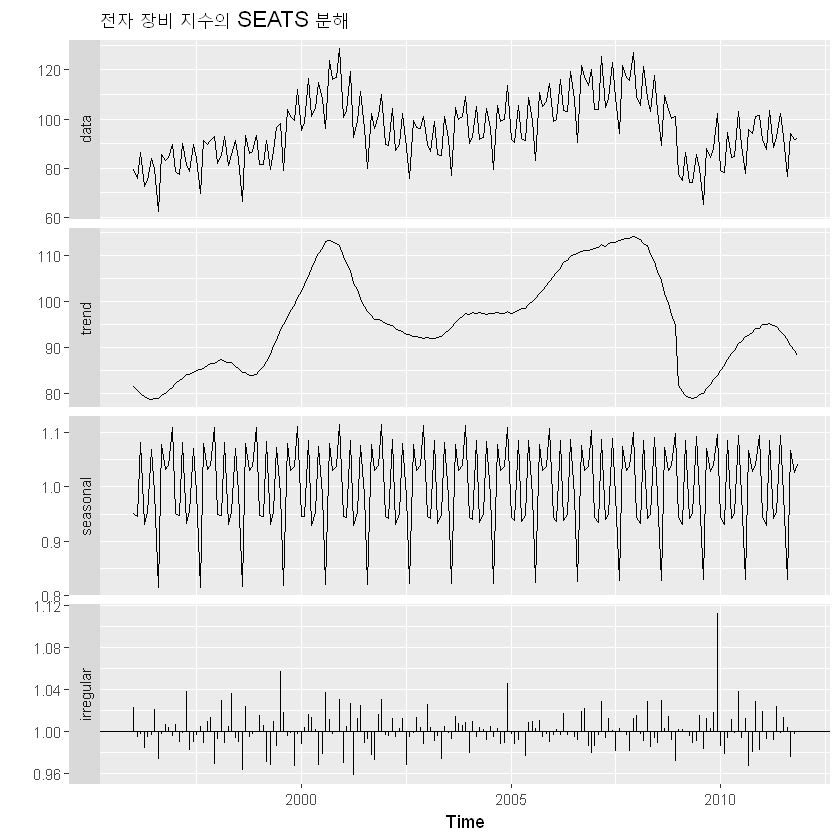

In [27]:
elecequip %>% seas() %>%
autoplot() +
  ggtitle("전자 장비 지수의 SEATS 분해")

<br>

### STL 분해

STL은 다양한 상황에서 사용할 수 있는 강력한 시계열 분해 기법입니다. **STL은 “Seasonal and Trend decomposition using Loess(Loess를 사용한 계절성과 추세 분해)”의 약자입니다. 여기에서 Loess는 비선형 관계를 추정하기 위한 기법입니다.** STL기법은 R. B. Cleveland, Cleveland, McRae, & Terpenning (1990) 가 개발하였습니다.

STL은 고전적인 분해, SEATS, X11을 뛰어넘는 몇 가지 장점을 가지고 있습니다:

* **SEAT와 X11과는 다르게, STL은 월별이나 분기별 데이터를 포함하여 어떤 종류의 계절성도 다룰 수 있습니다.**

* **계절적인 성분이 시간에 따라 변해도 괜찮습니다. 계절성분의 변화율을 사용자가 조절할 수 있습니다.**

* **추세-주기의 매끄러운 정도를 사용자가 조절할 수 있습니다.**

* **가끔 있는 이상값이 추세-주기와 계절성분에 영향을 주지 않게 만들 수 있습니다(즉, 사용자가 강력한 분해법을 명시할 수 있습니다). 하지만, 이상값은 나머지 성분(remainder)에 영향을 줄 것입니다.**


**반면에, STL은 몇 가지 단점을 가지고 있습니다. 특별히, 거래일이나 달력 변동을 자동으로 다루지 않고, 덧셈 분해만 지원합니다.**

* 데이터에 먼저 로그를 취하고 성분을 다시 원래대로 되돌리는 방식으로 곱셈 분해를 얻을 수 있습니다. 

* $0<\lambda<1$ 로 데이터의 박스-칵스(Box-Cox) 변환으로 덧셈과 곱셈 사이의 분해를 얻을 수 있습니다.
    * $\lambda=0$ 값은 곱셈 분해,  $\lambda = 1$은 덧셈 분해와 같습니다.

몇 가지 설정과 함께 예제와 실험을 살펴보는 것이 STL 사용법을 익히는 가장 좋은 방법입니다. 그림은 전자 장비 지수 데이터에 STL을 적용한 예입니다. 여기에서 추세-주기가 더 유동적이며, 계절성분이 시간에 따라서 변하지 않고, 안전한 옵션을 사용하였습니다. (`robust = TRUE`) **시계열 후반부에 감소 추세가 있다는 것과 (나머지 성분에서 큰 음수값 몇몇과 관계 있는) 2009년의 값이 특이하게 낮다는 것을 분명하게 알 수 있습니다.**



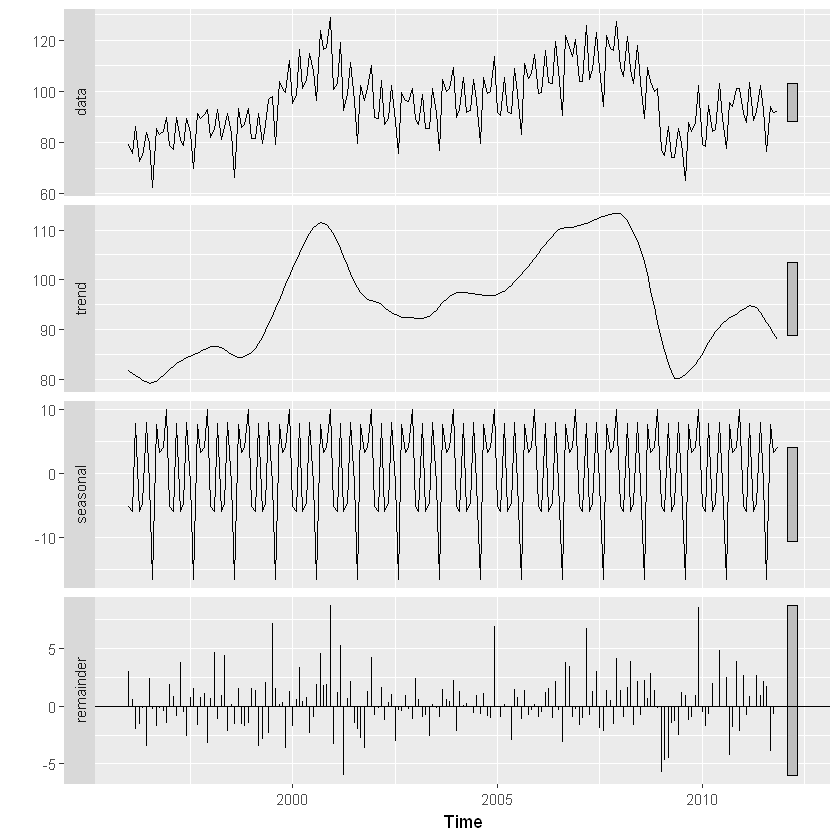

In [28]:
elecequip %>%
  stl(t.window=13, s.window="periodic", robust=TRUE) %>%
  autoplot()

STL을 사용할 때 선택한 두 개의 주 매개변수는 추세-주기 윈도우(`t.window`)와 계절성 윈도우(`s.window`)입니다. 
* **이러한 매개변수로 추세-주기와 계절성분이 급격하게 변할 지 조절할 수 있습니다. 값이 작을 수록 더 급격하게 변합니다.**
* **`t.window`와 `s.window` 둘 다 홀수이어야 합니다.**
* **`t.window`는 추세-주기를 추정할 때 사용할 연이은 관측값의 개수이고, `s.window`는 계절성분에서 각 값을 추정할 때 사용할 연이은 관측값의 개수입니다.** 

* **`s.window`에 기본 설정값이 없기 때문에 값을 설정해야만 합니다.**
    * 계절성 윈도우를 무한대로 설정하면 계절성분을 주기적으로 고정하는 것과 같습니다(즉, 매년 같게 두는 것입니다). 
* `t.window`를 정하는 것은 선택사항이며, 생략하면 기본 설정값을 사용할 것입니다.

<br>

`mstl()` 함수는 `s.window=13`와 자동으로 선택한 `t.window`를 이용하여 STL 분해를 자동으로 수행합니다. 
* 이 함수는 보통 계절성에 과대적합(over-fitting)이 일어나는 것과 시간에 따른 느린 변화를 허용하는 사이의 균형을 맞춰줍니다. 하지만, 자동화된 과정이라서, 기본 설정 때문에 몇몇 시계열에 대해 조정하는 작업이 필요할 것입니다.

<br>

## 06.07. 추세와 계절성의 강도를 측정하기

시계열 분해는 시계열에서 추세와 계절성의 강도를 측정하는데 사용할 수 있습니다. (Wang, Smith, & Hyndman, 2006) 시계열 분해를 다음과 같이 적는다는 것을 다시 떠올려봅시다.

$$y_t = T_t + S_{t} + R_t,$$

여기에서  $T_t$는 평활된 추세 성분이고, $S_t$는 계절성 성분, $R_t$는 나머지 성분입니다. 

**추세가 강하게 나타나는 데이터에서는, 계절성으로 조정된 데이터가 나머지 성분보다 훨씬 더 큰 변동성을 나타내야 합니다. 따라서 $(T_t+R_t)$  가 상대적으로 작아야 합니다.** 

**하지만 추세가 거의 없거나 아예 없는 데이터의 경우에는, 두 분산값이 근사적으로 같아야 합니다.** 따라서 추세의 강도를 다음과 같이 정의합니다:

$$F_T = \max\left(0, 1 - \frac{\text{Var}(R_t)}{\text{Var}(T_t+R_t)}\right).$$

이 식을 통해 추세의 강도를 0과 1 사이 값으로 얻을 수 있습니다. 나머지 성분의 분산이 계절성으로 조정된 데이터의 분산보다 훨씬 더 클 수 있기 때문에, $F_t$의 가능한 최소값을 0으로 두었습니다.

<br>

계절성의 강도를 비슷하게 정의합니다만, 계절성으로 조정된 데이터보다는 추세를 제거한 데이터에 대해: 

$$F_S = \max\left(0, 1 - \frac{\text{Var}(R_t)}{\text{Var}(S_{t}+R_t)}\right).$$

시계열의 계절성 강도 $F_s$가 0에 가까우면 거의 계절성이 없다는 것을 의미하고, $Var(R_t)$이 $Var(S_{t}+R_t)$에 비해 훨씬 작을 것이기 때문에 시계열에서 계절성이 강하게 나타나면 $F_s$가 1에 가깝게 나타날 것입니다.

이러한 측정량은 유용할 수 있습니다. 예를 들면, 데이터에 시계열 개수가 많은 경우에 가장 추세가 강한 것이나 가장 계절성이 강한 시계열을 찾아야 할 때 말입니다.

<br>

## 06.08. 분해법으로 예측하기

분해가 주로 시계열 데이터를 연구하거나 시간에 따른 변화를 살펴볼 때 유용하긴 하지만, 예측에도 사용할 수 있습니다.

덧셈 분해를 가정하면, 분해된 시계열을 다음과 같이 쓸 수 있습니다.

$$y_t = \hat{S}_t + \hat{A}_t,$$

여기에서 $\hat{A}_t = \hat{T}_t+\hat{R}_{t}$는 계절성으로 조정된 성분입니다. 또는, 곱셈 분해를 사용한다면, 다음과 같이 쓸 수 있습니다.

$$y_t = \hat{S}_t\hat{A}_t,$$

여기에서 $\hat{A}_t = \hat{T}_t\hat{R}_{t}$입니다.

**분해된 시계열을 예측하기 위해서, 계절성분 $\hat{S_t}$계절성으로 조정된 성분 $\hat{A_t}$ 각각을 예측합시다.** 계절성분이 변하지 않거나 엄청나게 느리게 변하는 상황을 보통 가정하고, 측정한 성분의 마지막 연도를 이용하여 예측합니다. 다르게 말하면, 계절성분에 나이브 계절성 기법을 사용합니다.

**계절성으로 조정된 성분을 예측하기 위해서, 비-계절성 예측 기법을 사용할 수 있습니다. 예를 들면, 표류를 고려하는 확률보행 모델(a random walk with drift model), (다음 장에서 다룰) 홀트(Holt)의 기법, 또는 비-계절성 ARIMA 모델을 사용할 수 있습니다.**

<br>

### 예제: 전자 장비 제조

* 전자 장비 지수 데이터를 계절성으로 조절한 것의 단순(naïve) 예측치를 나타냅니다. 그러면 **계절성분의 단순 계절성 예측에 더하여 “재-계절화(reseasonalised)”됩니다.**

In [31]:
fit <- stl(elecequip, t.window=13, s.window="periodic",
  robust=TRUE)

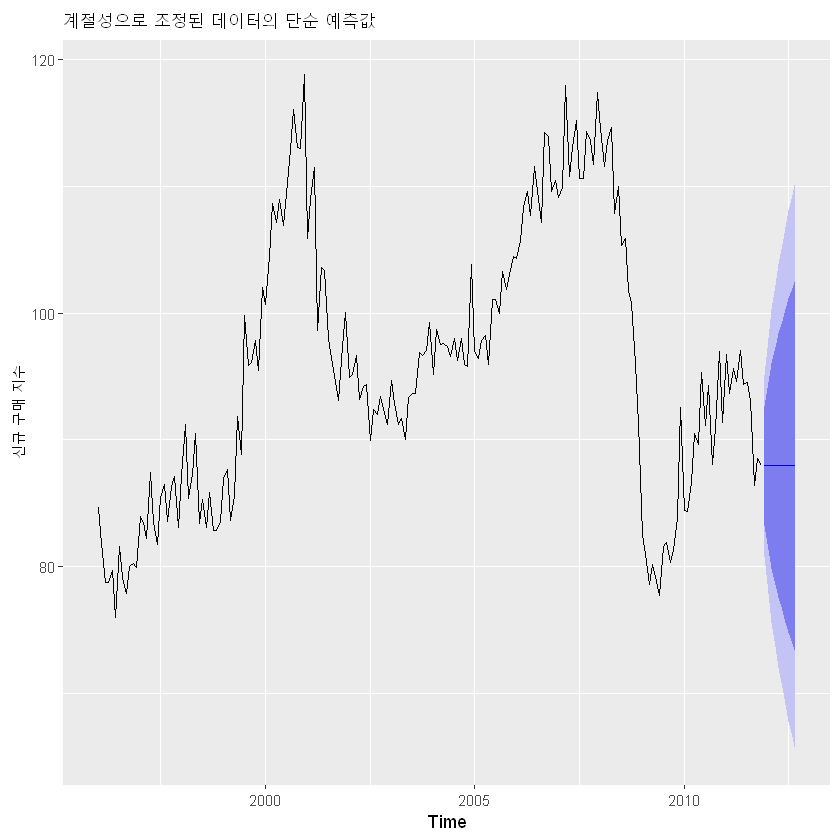

In [32]:
fit %>% seasadj() %>% naive() %>%
  autoplot() + ylab("신규 구매 지수") +
  ggtitle("계절성으로 조정된 데이터의 단순 예측값")

이렇게 하면 `stl` 객체에 `forecast()` 함수를 적용한 것을 다루기 쉽습니다. 계절성으로 조정된 데이터에는 사용할 기법을 입력해야 하고, 그러면 이 함수가 재-계절화를 수행할 것입니다. 그림은 원본 데이터의 결과 예측치입니다.

<br>

* 데이터를 STL 분해 후, 계절성으로 조정된 데이터의 단순 예측값과 계절성분의 계절성 단순 예측값에 근거한 전자 장비 구매 데이터 예측값.

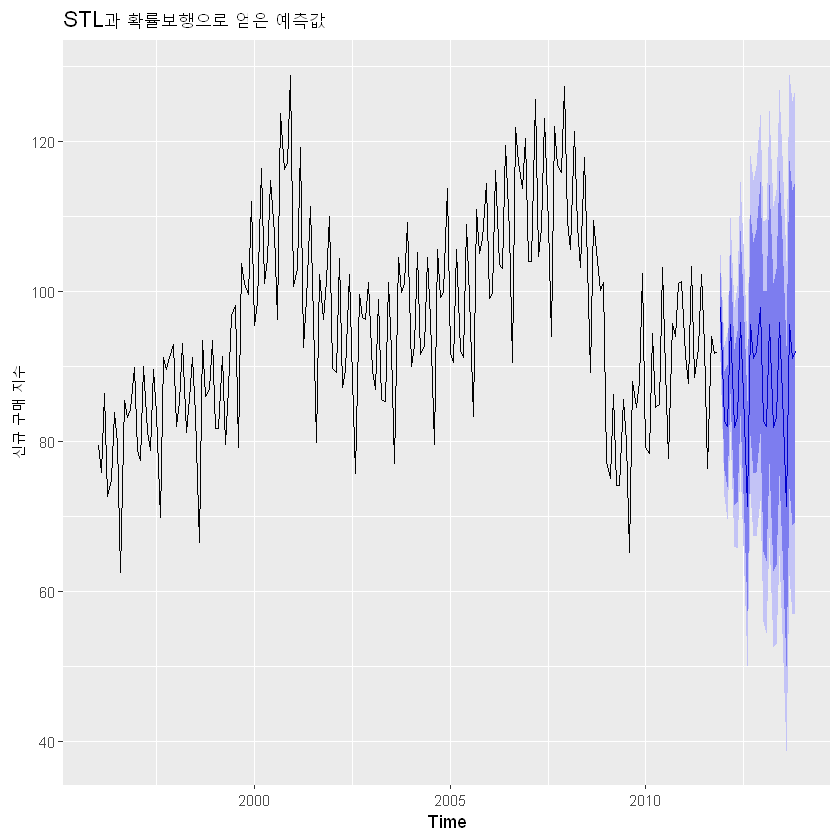

In [33]:
fit %>% forecast(method="naive") %>%
  autoplot() + ylab("신규 구매 지수") +
  ggtitle("STL과 확률보행으로 얻은 예측값")

이 그래프에 나타난 예측구간(prediction interval)은 점 예측치(point forecast)와 같은 방식으로 생성된 것입니다. **즉, 예측구간의 위쪽과 아래쪽 극한은 계절성분의 예측치에 더하여 “재계절화(reseasonalising)”된 것입니다 이러한 계산 과정에서 계절성분의 예측치의 불확실성은 무시되었습니다. 계절성으로 조정된 데이터에 비해 계절성분의 불확실성이 매우 작다는 사실이 이렇게 선택할 수 있는 근거가 되고, 따라서 불확실성을 무시하여 근사하는 것이 타당합니다.**

`stlf` 함수를 이용하면 좀 더 간단하게 작업할 수 있습니다. 다음의 코드는 STL을 이용하여 시계열을 분해하고, 계절성으로 조정된 시계열을 예측하여, 재계절화된 예측값을 돌려줍니다.

In [35]:
fcast <- stlf(elecequip, method='naive')

`stlf()` 함수는 분해를 수행하기 위해 `mstl()`을 사용합니다. 따라서 `s.window`와 `t.window`의 기본 설정값을 사용합니다